# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("data/marketing_investimento.csv")

In [3]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(dados, x = "aderencia_investimento", text_auto= True) # text_auto= True -> Informar os números

#### Construção das barras estado civil com base na aderencia_investimentos, se determinado estado civil influencia ou não na escolha de investimentos

In [7]:
px.histogram(dados, x = "estado_civil", text_auto= True, color= "aderencia_investimento", barmode="group")

In [8]:
px.histogram(dados, x = "escolaridade", text_auto= True, color= "aderencia_investimento", barmode="group")

In [9]:
px.histogram(dados, x = "inadimplencia", text_auto= True, color= "aderencia_investimento", barmode="group")

In [10]:
px.histogram(dados, x = "fez_emprestimo", text_auto= True, color= "aderencia_investimento", barmode="group")

### Variáveis numéricas

In [11]:
px.box(dados, x = "idade", color="aderencia_investimento")

In [12]:
px.box(dados, x = "saldo", color="aderencia_investimento")

In [13]:
px.box(dados, x = "tempo_ult_contato", color="aderencia_investimento")

In [14]:
px.box(dados, x = "numero_contatos", color="aderencia_investimento")

## Transformando dados

Para fazre a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas.
O **y** representa a variável que queremos prever, enquanto o x representa todas as variáveis que serão utilizadas para explicas o comportamneto de **y**

In [15]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


A coluna que é a nossa resposta é chamada de **Variável Alvo** e todas as outras que serão utilizadas para explicar aquele resultado são chamadas de **Variáveis Explicativas**.

In [16]:
# Variáveis explicativas
x = dados.drop("aderencia_investimento", axis=1)

# Variavel alvo
y = dados["aderencia_investimento"]

In [17]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [18]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

Encontramos um detalhe nos dados: tanto nas nossas variáveis explicativas quanto na nossa variável alvo, algumas colunas estão em formato textual, e esse tipo de informação não é compreendido pelo algoritmo. Este só consegue compreender informações numéricas.

Portanto, precisamos realizar algum tratamento nos dados para transformar essas variáveis categóricas em alguma informação numérica que o modelo consiga aprender.

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
# Armazenando as colunas numa variável
colunas = x.columns

In [21]:
# Cria um transformador de colunas que aplica a codificação one-hot às colunas especificadas e deixa as demais colunas inalteradas
one_hot = make_column_transformer(
    (
        OneHotEncoder(drop="if_binary"),  # Inicializa o OneHotEncoder configurado para descartar uma categoria se a variável for binária
        ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']  # Especifica as colunas a serem codificadas
    ),
    remainder="passthrough",  # Mantém as colunas que não estão sendo transformadas sem alterações
    sparse_threshold=0  # Garante que a saída não será uma matriz esparsa, mas sim uma matriz densa (array numpy)
)

In [22]:
# Aplica o transformador one_hot ao dataframe x e transforma os dados, armazenando o resultado em x
x = one_hot.fit_transform(x)  

In [23]:
# Retorna o nomes novos das colunas depois do processo de transformação
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [24]:
pd.DataFrame(x, columns= one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


### Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato númerico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
y = label_encoder.fit_transform(y)

In [28]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Ajustando modelos

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Divide os dados em conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x,  # Variáveis preditoras (features) a serem divididas
    y,  # Variável alvo (label) a ser dividida
    stratify=y,  # Garante que a divisão mantém a mesma proporção das classes da variável alvo nos conjuntos de treino e teste
    random_state=5  # Define um valor para a semente do gerador de números aleatórios, garantindo a reprodutibilidade da divisão
)

### Modelo base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe qe tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possivel

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
dummy = DummyClassifier()  # Inicializa uma instância do DummyClassifier com os parâmetros padrão
dummy.fit(x_treino, y_treino)  # Ajusta (treina) o DummyClassifier usando os dados de treino (x_treino e y_treino)

# Avaliar o desempenho do modelo, gerar a taxa de acerto do modelo passando o x de teste e y de teste
dummy.score(x_teste, y_teste)

0.6025236593059937

### Árvore de decisão

O modelo de árvore de decisão é muit utilizado pela sua alta **explicabilidade** e **processamento rápdio**, matendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
arvore = DecisionTreeClassifier(random_state= 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [35]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [36]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [38]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


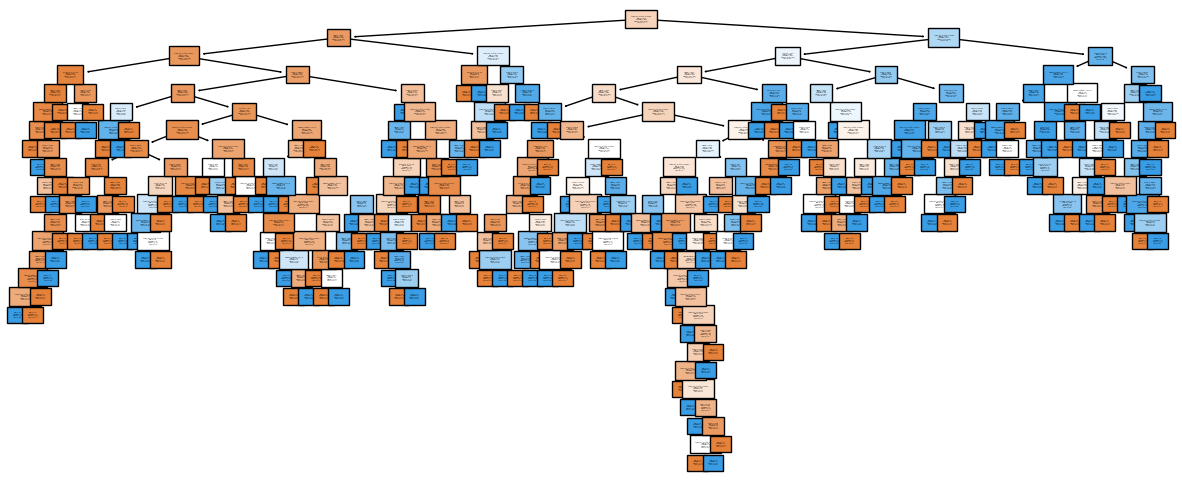

In [39]:
plt.figure(figsize=(15,6)) # Tamanho horizontal e vertical
plot_tree(arvore, filled=True, class_names=["nao", "sim"], fontsize=1, feature_names=nome_colunas);

In [40]:
arvore.score(x_treino, y_treino)

1.0

In [41]:
from sklearn.tree import DecisionTreeClassifier  # Importa a classe DecisionTreeClassifier do módulo tree da biblioteca sklearn

arvore = DecisionTreeClassifier(max_depth=3, random_state=5)
# Inicializa uma instância de DecisionTreeClassifier com os seguintes parâmetros:
# - max_depth=3: Limita a profundidade máxima da árvore de decisão a 3 níveis. Isso evita que a árvore cresça excessivamente, ajudando a prevenir overfitting.
# - random_state=5: Define uma semente para o gerador de números aleatórios usado para seleção de recursos e divisão de nós na árvore. Isso garante que a árvore seja construída de forma determinística e reproduzível.

arvore.fit(x_treino, y_treino)
# Ajusta (treina) o DecisionTreeClassifier usando os dados de treino x_treino e y_treino.
# Durante o treinamento, o classificador constrói a árvore de decisão com base nos dados fornecidos, utilizando a estratégia definida pelos parâmetros passados.


DecisionTreeClassifier(max_depth=3, random_state=5)

In [42]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [43]:
arvore.score(x_teste, y_teste)

0.7160883280757098

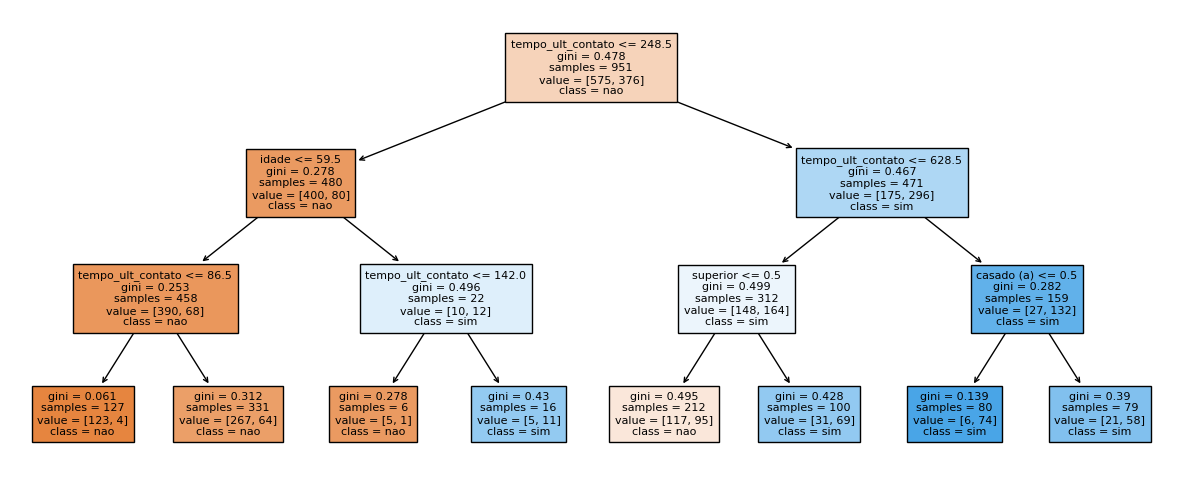

In [44]:
plt.figure(figsize=(15,6)) # Tamanho horizontal e vertical
plot_tree(arvore, filled=True, class_names=["nao", "sim"], fontsize=8, feature_names=nome_colunas);

### Seleção de modelos

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
normalizacao = MinMaxScaler()
x_treino_nromalizado = normalizacao.fit_transform(x_treino)

In [47]:
pd.DataFrame(x_treino_nromalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


### KNN

O algoritmo KNN se baseia no calculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns do outros (vizinhos) para tomar a decisão de classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(x_treino_nromalizado, y_treino)

KNeighborsClassifier()

In [51]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [52]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808


### Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.

Podemos armazenar o modelo num arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [53]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


In [54]:
import pickle

In [55]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [56]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [57]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [58]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [59]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [60]:
modelo_one_hot = pd.read_pickle("modelo_onehotenc.pkl")
modelo_arvore = pd.read_pickle("modelo_arvore.pkl")

In [62]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])